## Привязка ID.xlsx

In [4]:
df = pd.read_excel('Привязка ID.xlsx')
print(df.head())

   ID              Источник
0   1  Маркетинговый список
1   2  Маркетинговый список
2   3  Маркетинговый список
3   4  Маркетинговый список
4   5  Маркетинговый список


# Нормализация данных, вычисление корреляции, графики

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
data = pd.read_excel(r'Sample_20_people\train20_data.xlsx')
df = pd.DataFrame(data)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 13 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   ID                                                                        317 non-null    int64  
 1   Находится в реестре МСП                                                   317 non-null    int64  
 2   Размер уставного капитала объявленный                                     317 non-null    int64  
 3   Численность персонала по данным ФНС.Количество                            317 non-null    int64  
 4   Карточка клиента (внешний источник).Индекс платежной дисциплины Значение  317 non-null    int64  
 5   Карточка клиента (внешний источник).Индекс финансового риска Значение     317 non-null    int64  
 6   Провозная плата (период 1)                                        

### нормализация с использованием scaler.fit_transform

### нормализация с использованием MinMaxScaler

### нормализация с использованием RobustScaler

### нормализация с использованием Log Transformation (ПРИОРИТЕТ)

In [10]:
import numpy as np

df[['Размер уставного капитала объявленный', 'Численность персонала по данным ФНС.Количество', 
    'Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', 
    'Карточка клиента (внешний источник).Индекс финансового риска Значение',
    'Провозная плата (период 1)', 'Провозная плата (период 2)',
    'Объем перевозок(тн) (период 1)', 'Объем перевозок(тн) (период 2)',
    'positive_action', 'Devotion' 
    ]] = np.log1p(df[['Размер уставного капитала объявленный', 'Численность персонала по данным ФНС.Количество', 
    'Карточка клиента (внешний источник).Индекс платежной дисциплины Значение', 
    'Карточка клиента (внешний источник).Индекс финансового риска Значение',
    'Провозная плата (период 1)', 'Провозная плата (период 2)',
    'Объем перевозок(тн) (период 1)', 'Объем перевозок(тн) (период 2)',
    'positive_action', 'Devotion' 
                     ]])

### ...продолжение главной темы

In [12]:
# Выведем окончательный результат (нормализованные параметры )
df.style

,ID,Находится в реестре МСП,Размер уставного капитала объявленный,Численность персонала по данным ФНС.Количество,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Значение,Провозная плата (период 1),Провозная плата (период 2),Объем перевозок(тн) (период 1),Объем перевозок(тн) (период 2),positive_action,Devotion,Churn
0,9,0,0.000000,2.944439,0.000000,3.332205,0.000000,12.032564,0.000000,3.931826,0.693147,0.693147,0
1,25,0,0.000000,5.891644,0.000000,3.258097,16.361387,16.717543,10.344834,10.460930,0.000000,0.693147,0
2,33,0,19.910175,7.594884,4.442651,3.091042,18.206639,18.476958,10.258045,10.348622,0.000000,3.911843,1
3,86,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0
4,115,0,16.849181,7.100027,4.574711,2.833213,18.191147,18.548351,10.320255,10.629804,1.098612,4.044515,1
5,144,0,10.819798,6.361302,4.615121,3.135494,13.437555,12.386175,5.062595,3.891820,0.693147,4.035137,1
6,247,0,0.000000,0.000000,0.000000,0.000000,0.000000,16.401064,0.000000,7.810758,0.000000,0.693147,0
7,293,0,0.000000,5.937536,0.000000,2.944439,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0
8,335,1,9.210440,2.890372,0.000000,3.044522,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0
9,417,1,15.909133,3.367296,0.000000,3.737670,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0


In [15]:
# Посмотрим на первые несколько строк данных
#print("Первые 5 строк данных:")
#df.head()

# Получим основные статистические показатели о клиентах
print("\nОсновные статистики о клиентах:")
df.describe()


Основные статистики о клиентах:


,ID,Находится в реестре МСП,Размер уставного капитала объявленный,Численность персонала по данным ФНС.Количество,Карточка клиента (внешний источник).Индекс платежной дисциплины Значение,Карточка клиента (внешний источник).Индекс финансового риска Значение,Провозная плата (период 1),Провозная плата (период 2),Объем перевозок(тн) (период 1),Объем перевозок(тн) (период 2),positive_action,Devotion,Churn
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,4917.003155,0.583596,11.331461,3.702399,1.307623,2.941622,11.059221,10.676335,5.476624,5.336068,0.312265,1.616845,0.280757
std,3194.071571,0.493742,5.651695,2.197536,2.051334,0.999300,6.808906,7.225537,3.838276,4.015073,0.553414,1.482225,0.450080
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000
25%,2208.000000,0.000000,9.210440,1.945910,0.000000,2.397895,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000
50%,4109.000000,1.000000,10.308986,3.828641,0.000000,2.944439,13.794019,14.010122,6.079933,6.255750,0.000000,0.693147,0.000000
75%,7529.000000,1.000000,15.511126,5.379897,4.418841,3.610918,15.796466,16.151724,8.525360,8.562740,0.693147,3.881348,1.000000
max,11158.000000,1.000000,23.025851,8.669571,4.615121,4.595120,22.598938,22.388015,15.179789,14.922247,2.995732,4.125432,1.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

### Графики

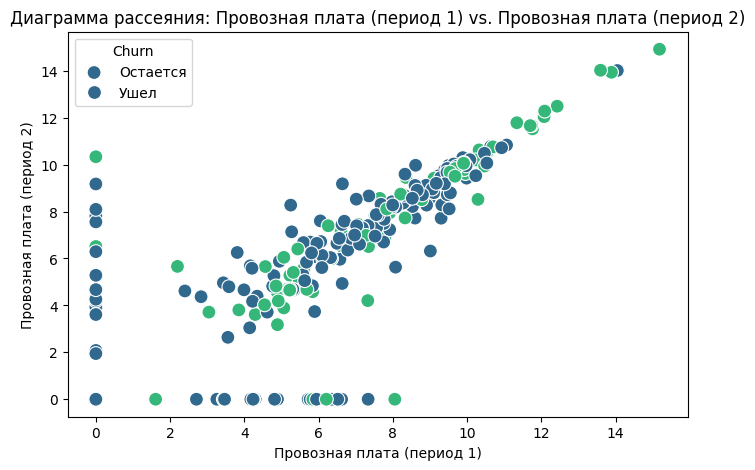

In [17]:
# диаграмма рассеяния для визуализации связи между признаками Провозная_плата_сумма и Объем_перевозок_сумма
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Объем перевозок(тн) (период 1)', y='Объем перевозок(тн) (период 2)', data=df, 
                hue='Churn', palette='viridis', s=100)
plt.xlabel('Провозная плата (период 1)')
plt.ylabel('Провозная плата (период 2)')
plt.title('Диаграмма рассеяния: Провозная плата (период 1) vs. Провозная плата (период 2)')
plt.legend(title='Churn', labels=['Остается', 'Ушел'])
plt.show()

Text(0, 0.5, 'Частота')

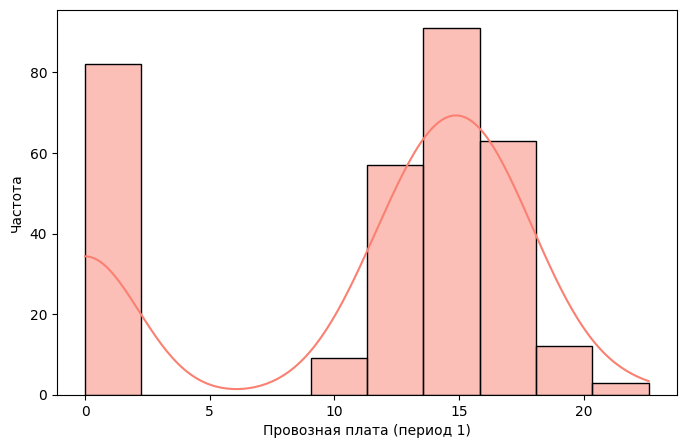

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Провозная плата (период 1)'], bins=10, kde=True, color='salmon')
plt.xlabel('Провозная плата (период 1)')
plt.ylabel('Частота')
plt.title('Провозная плата (период 1)')
plt.show()

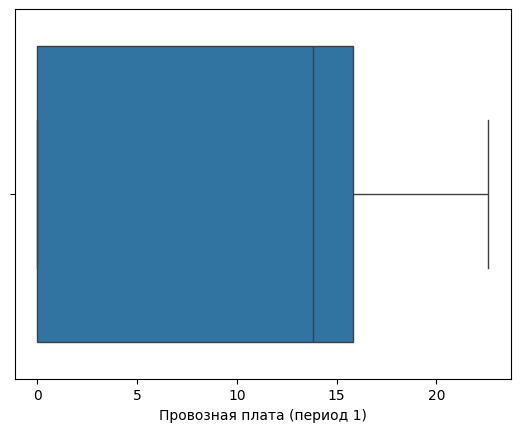

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.boxplot(x='Провозная плата (период 1)', data=df)
plt.show()

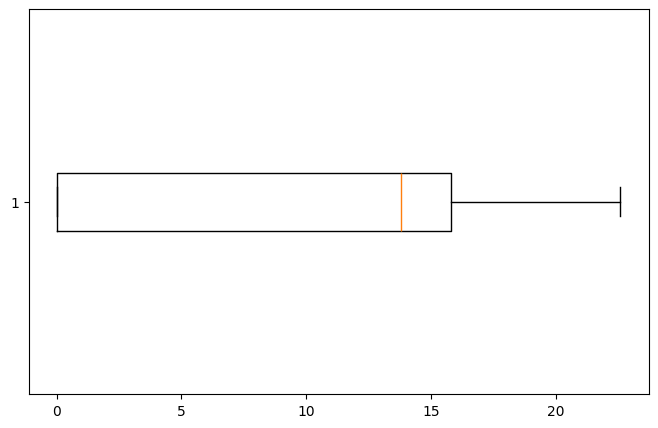

In [40]:
# коробка с усами
plt.figure(figsize=(8, 5))
plt.boxplot(df['Провозная плата (период 1)'], vert=False)
#plt.boxplot(data['Провозная плата (период 1)'], vert=False)

plt.show()

## Матрица корреляции

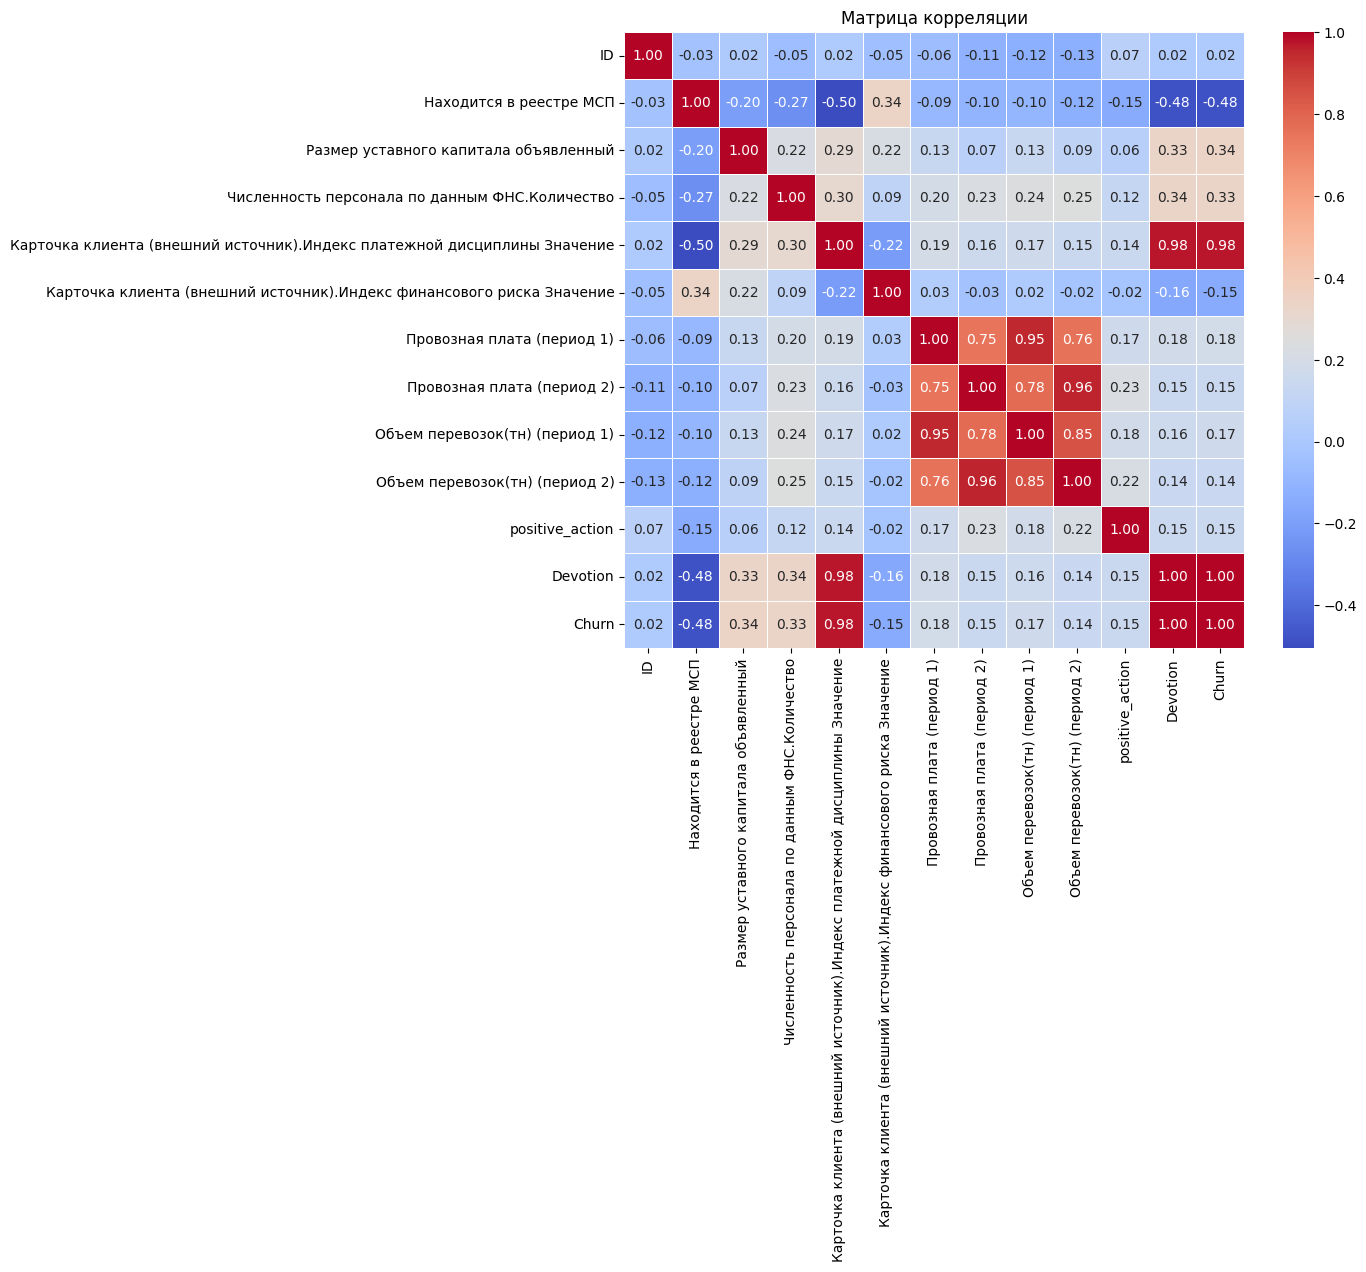

In [15]:
# Матрица корреляции между признаками
correlation_matrix = df.corr()

# Визуализируем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции')


#plt.savefig('correlation_matrix.png', format='png', dpi=300)  # Сохранение в PNG
plt.show()


<Axes: >

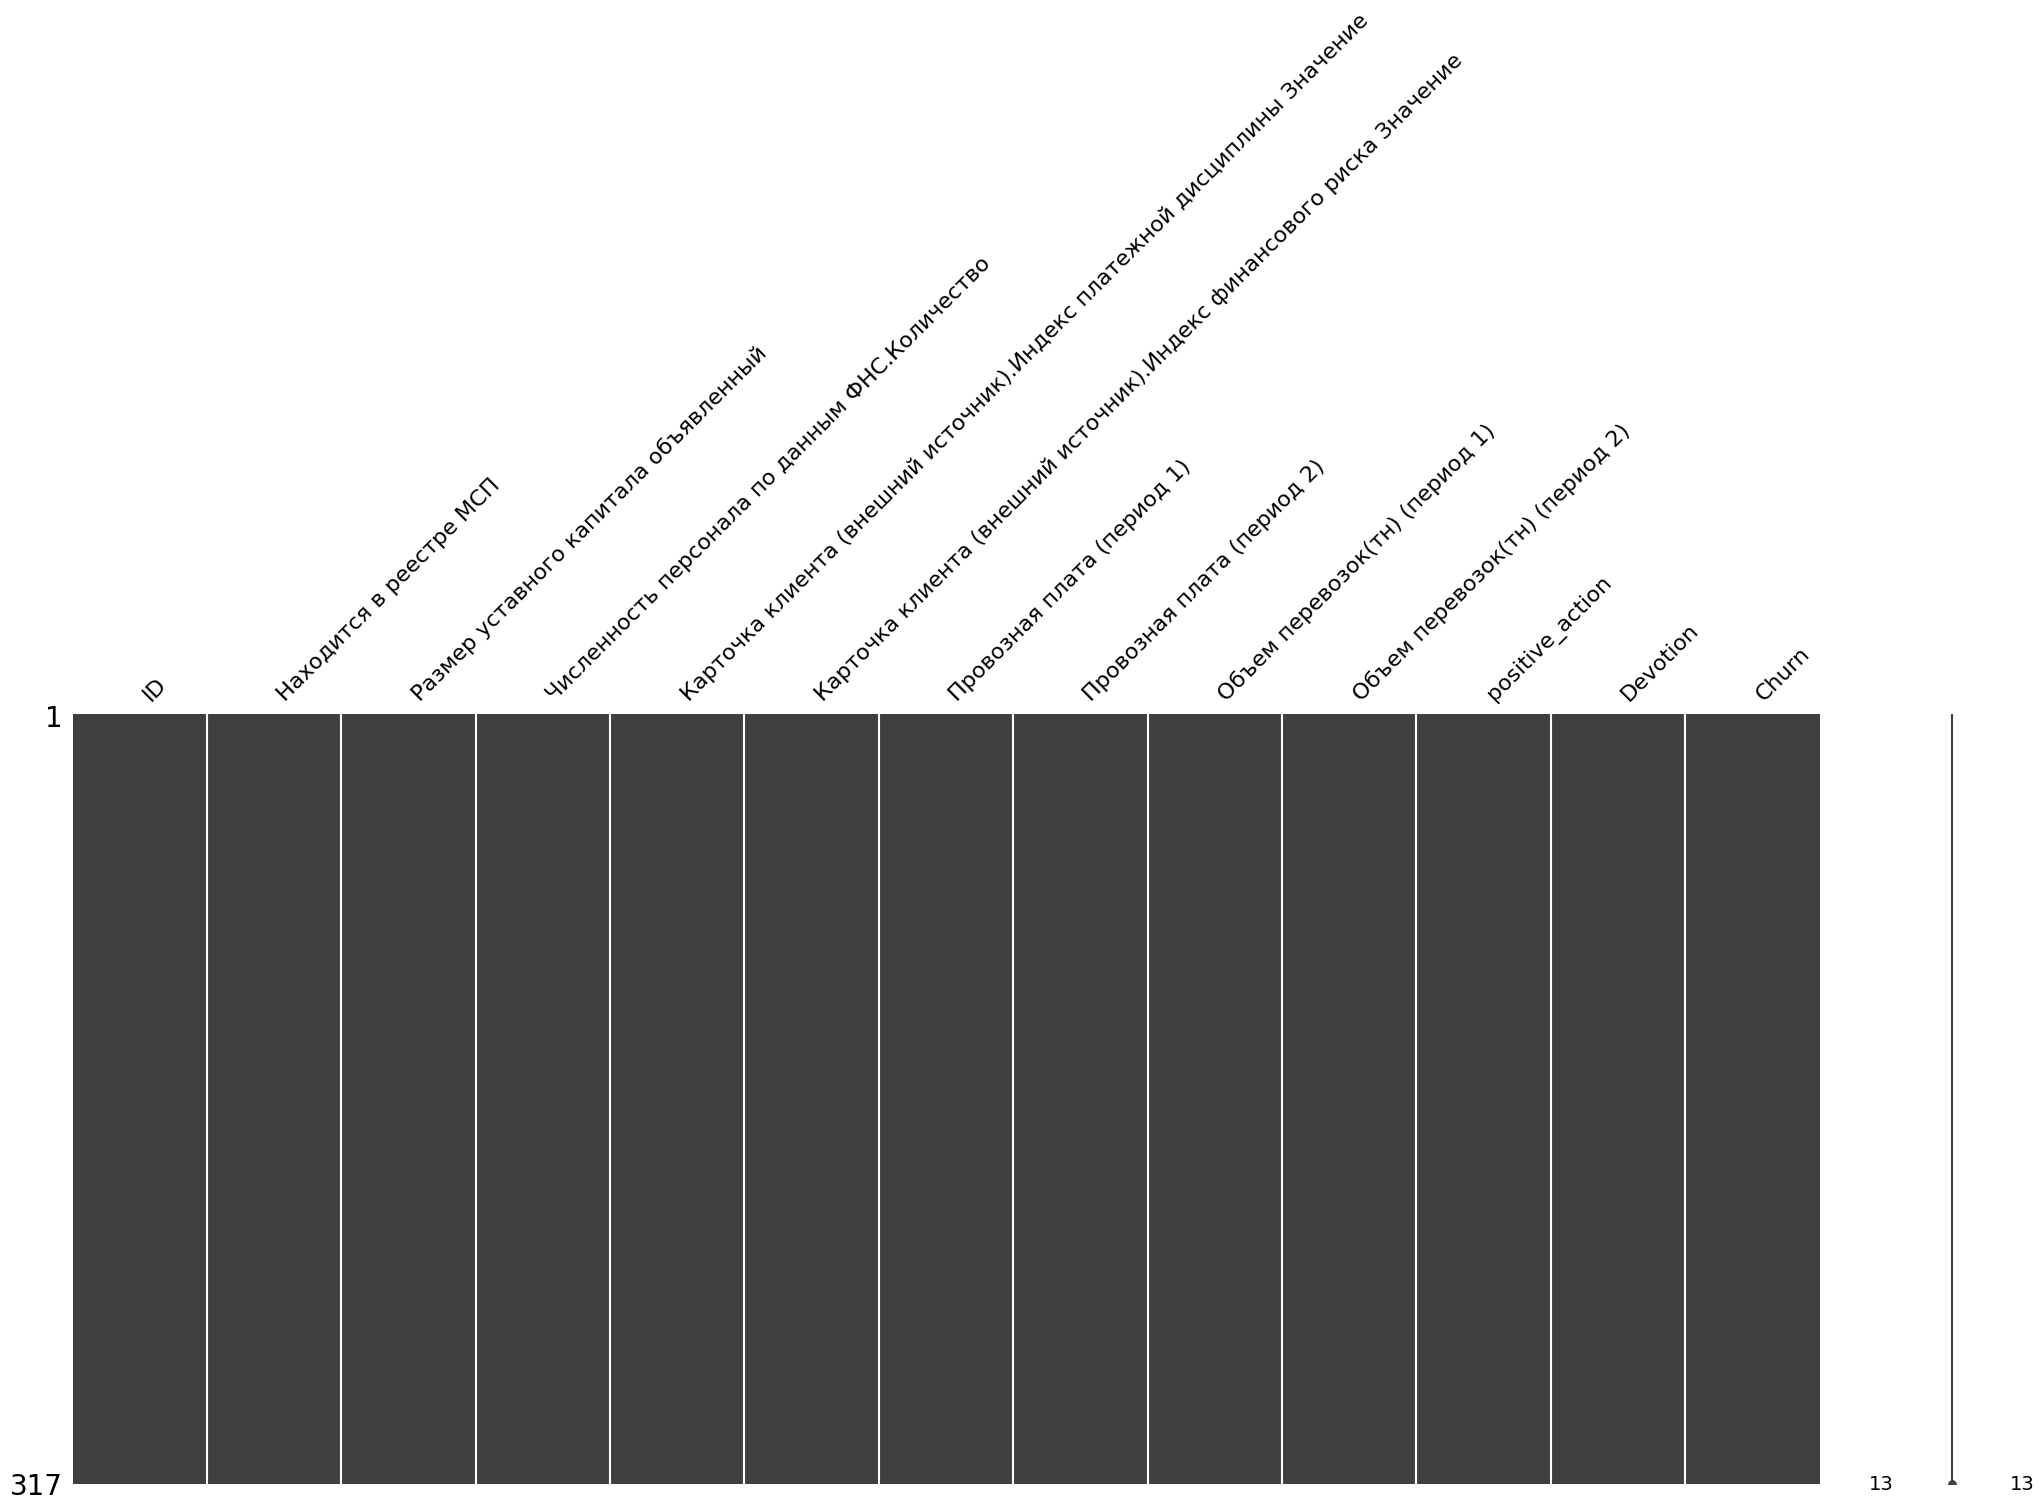

In [54]:
import missingno as msno
msno.matrix(df)